# Occultation of TYC 2924-02100-1 by Egeria

This occultation took place on Dec 19, 2020

In [1]:
## SORA package
from sora import Occultation, Body, Star, LightCurve, Observer
from sora.prediction import prediction
from sora.extra import draw_ellipse

## Other main packages
from astropy.time import Time
import astropy.units as u

## Usual packages
import numpy as np
import matplotlib.pylab as pl
import os
import sys

# Add the directory to sys.path
sys.path.append('/home/joshuabartkoske/AO/scripts')
from Occultations2 import Open_Two_Column_File

SORA version: 0.3.1


In [2]:
# First, let's consider the Solar System Body

egeria = Body(name='Egeria')
                #,ephem=['guidelines/input/bsp/Chariklo.bsp', 'guidelines/input/bsp/de438_small.bsp'])

print(egeria)

Obtaining data for Egeria from SBDB
###############################################################################
                              13 Egeria (A850 VA)                              
###############################################################################
Object Orbital Class: Main-belt Asteroid
Spectral Type:
    SMASS: Ch  [Reference: EAR-A-5-DDR-TAXONOMY-V4.0]
    Tholen: G [Reference: EAR-A-5-DDR-TAXONOMY-V4.0]
       Linear, generally featureless spectra. Differences in UV absorption features and presence/absence of narrow absorption feature near 0.7 μm.
Discovered 1850-Nov-02 by De Gasparis, A. at Naples

Physical parameters:
Diameter:
    202.64 +/- 50.084 km
    Reference: urn:nasa:pds:neowise_diameters_albedos::2.0[mainbelt] (http://adsabs.harvard.edu/abs/2015ApJ...814..117N), 
Rotation:
    7.045 +/- 0 h
    Reference: LCDB (Rev. 2023-February); Warner et al., 2009, REFERENCE LIST:[Chang, Y.C.; Chang, C.-S. (1963) Acta Astron. Sin. 11, 139-149.], [Lagerkvi

In [3]:
pred = prediction(body=egeria, time_beg='2020-12-18',time_end='2020-12-20',mag_lim=12)
pred

Ephemeris was split in 1 parts for better search of stars

Searching occultations in part 1/1
Generating Ephemeris between 2020-12-18 00:00:00.000 and 2020-12-19 23:59:00.000 ...
    19 GaiaDR3 stars downloaded
Identifying occultations ...

1 occultations found.


        Use get_body("moon") instead. [sora.prediction.table]


Epoch,ICRS Star Coord at Epoch,Geocentric Object Position,C/A,P/A,Vel,Dist,G,long,loct,M-G-T,S-G-T,GaiaDR3 Source ID
,,,arcsec,deg,km / s,AU,mag,deg,hh:mm,deg,deg,
object,object,object,float64,float64,float64,float64,float64,float64,str5,float64,float64,str18
2020-12-19 06:13:50.680,05 55 35.54739 +43 26 22.68355,05 55 35.49285 +43 26 21.14913,1.645,201.16,-11.52,1.440,11.189,267,00:02,123,160,193323800915713024


In [3]:
## ploting the occultation map

#pred['2020-12-19 06:13:50.680'].plot_occ_map(nameimg='figures/observations/Egeria_20201219_map')
# create a map of the occultation
sites = {}
sites['VERITAS'] = [ -110.950960, 31.674877, 20, 20, 'blue', 'o'] # T1 coordinates
pred['2020-12-19 06:13:50.680'].plot_occ_map(nameimg='figures/observations/egeria_20201219_map_zoomed', resolution=3, zoom=5, centerproj=[-111, 32], sites=sites)

NameError: name 'pred' is not defined

In [4]:
star_occ = Star(code='193323800915713024')

print(star_occ)

1 GaiaDR3 star found band={'G': 11.188705}
star coordinate at J2016.0: RA=5h55m35.54725s +/- 0.0173 mas, DEC=43d26m22.6999s +/- 0.015 mas

GaiaDR3 star Source ID: 193323800915713024
ICRS star coordinate at J2016.0:
RA=5h55m35.54725s +/- 0.0173 mas, DEC=43d26m22.6999s +/- 0.0150 mas
pmRA=0.326 +/- 0.019 mas/yr, pmDEC=-3.370 +/- 0.014 mas/yr
GaiaDR3 Proper motion corrected as suggested by Cantat-Gaudin & Brandt (2021) 
Plx=0.8327 +/- 0.0208 mas, Rad. Vel.=17.16 +/- 4.13 km/s 

Magnitudes: G: 11.189, B: 11.642, V: 11.374, R: 11.200, J: 10.458, H: 10.336,
            K: 10.293

Apparent diameter from Kervella et. al (2004):
    V: 0.0347 mas, B: 0.0338 mas
Apparent diameter from van Belle (1999):
    sg: B: 0.0413 mas, V: 0.0432 mas
    ms: B: 0.0365 mas, V: 0.0324 mas
    vs: B: 0.0626 mas, V: 0.0562 mas


In [20]:
occ = Occultation(star=star_occ, body=egeria, time='2020-12-19 06:13:50.680')

print(occ)

        Use get_body("moon") instead. [sora.prediction.table]


Stellar occultation of star GaiaDR3 193323800915713024 by 13 Egeria (A850 VA).

Geocentric Closest Approach: 1.645 arcsec
Instant of CA: 2020-12-19 06:13:50.660
Position Angle: 201.16 deg
Geocentric shadow velocity: -11.52 km / s
Sun-Geocenter-Target angle:  159.93 deg
Moon-Geocenter-Target angle: 122.50 deg


No observations reported

###############################################################################
                                     STAR                                      
###############################################################################
GaiaDR3 star Source ID: 193323800915713024
ICRS star coordinate at J2016.0:
RA=5h55m35.54725s +/- 0.0173 mas, DEC=43d26m22.6999s +/- 0.0150 mas
pmRA=0.326 +/- 0.019 mas/yr, pmDEC=-3.370 +/- 0.014 mas/yr
GaiaDR3 Proper motion corrected as suggested by Cantat-Gaudin & Brandt (2021) 
Plx=0.8327 +/- 0.0208 mas, Rad. Vel.=17.16 +/- 4.13 km/s 

Magnitudes: G: 11.189, B: 11.642, V: 11.374, R: 11.200, J: 10.458, H: 10.336,
   

**After that, we instantiate the observers and their light curves**

**Observers**

Now let's define our observers, they can be setted manually or from the MPC database

In [5]:
### User

T1 = Observer(name='Telescope 1', lat='31 40 29.5572', lon='-110 57 3.456', height =1268)
T2 = Observer(name='Telescope 2', lat='31 40 28.2756', lon='-110 57 6.8976', height =1260)
T3 = Observer(name='Telescope 3', lat='31 40 31.8936', lon='-110 57 7.4844', height =1267)
T4 = Observer(name='Telescope 4', lat='31 40 30.2556', lon='-110 57 9.9756', height =1265)

print(T2)


Site: Telescope 2
Geodetic coordinates: Lon: -110d57m06.8976s, Lat: 31d40m28.2756s, height: 1.260 km


In [6]:
# set up the objects for the occultation parameter calculation
from sora import EphemHorizons
egeria_time = Time("2020-12-19 06:13:50.680")
egeria_ephem = EphemHorizons(name='egeria')
egeria_star = Star(catalogue='gaiadr3', code='193323800915713024')

1 GaiaDR3 star found band={'G': 11.188705}
star coordinate at J2016.0: RA=5h55m35.54725s +/- 0.0173 mas, DEC=43d26m22.6999s +/- 0.015 mas



In [7]:
from sora.prediction import occ_params
time_of_closest_approach, distance_of_closest_approach, position_angle_of_closest_approach, velocity_shadow, distance_to_object = occ_params(star=egeria_star, ephem=egeria_ephem, time=egeria_time, max_tdiff=600, reference_center=T1)

print("Occultation of TYC 2924-02100-1 by Egeria over VERITAS")
print("--------------------------------------------------------")
print(f"Time of closest approach: {time_of_closest_approach}")
print(f"Distance of closest approach: {distance_of_closest_approach} ")
print(f"Position angle of closest approach: {position_angle_of_closest_approach}")
print(f"Velocity of occultation shadow: {velocity_shadow} ")
print(f"Distance to the occulting body: {distance_to_object.to(u.km)} or {distance_to_object}")

Occultation of TYC 2924-02100-1 by Egeria over VERITAS
--------------------------------------------------------
Time of closest approach: 2020-12-19 06:15:30.900
Distance of closest approach: 0.04758944136270511 arcsec 
Position angle of closest approach: 200.81508485286858 deg
Velocity of occultation shadow: -11.900630016998468 km / s 
Distance to the occulting body: 215467538.55061784 km or 1.44031153346234 AU


**Light Curves**

Now let's define our light curves, they can be instanciated from different way: 
- **(i)** Manually with arrays containing the flux and the times; 
- **(ii)** Read an ASCII file; 
- **(iii)** Already obtained times.

**Telescope 1**

In [8]:
T1_raw_lc = LightCurve(name='Telescope 1 Raw lc',file='/home/joshuabartkoske/AO/data/20201219/20201219-TYC2924_02100_1-T1-occultation.txt',
                    exptime=1/300, usecols=[0,1], 
                    central_bandpass=0.415, delta_bandpass=0.2, 
                    tref="2020-12-19 06:15:02")

print(T1_raw_lc)

Light curve name: Telescope 1 Raw lc
Initial time: 2020-12-19 06:18:32.001 UTC
End time:     2020-12-19 06:19:02.000 UTC
Duration:     0.500 minutes
Time offset:  0.000 seconds

Exposure time:    0.0033 seconds
Cycle time:       0.0008 seconds
Num. data points: 36000


There is no occultation associated with this light curve.

Object LightCurve model was not fitted.

Immersion and emersion times were not fitted or instantiated.




/home/joshuabartkoske/mySORA_env/lib/python3.10/site-packages/sora/lightcurve/core.py:436: UserWarning: Exposure time (0.0033 seconds) higher than Cycle time (0.0008 seconds)
  warnings.warn('Exposure time ({:0.4f} seconds) higher than Cycle time ({:0.4f} seconds)'.


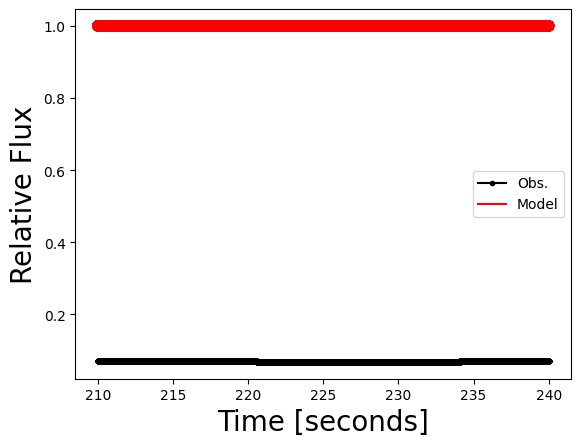

In [12]:
T1_raw_lc.plot_lc()
pl.show()

{'rank': 1,
 'occultation_duration': np.float64(13.52279242923089),
 'central_time': np.float64(227.3208759624394),
 'immersion_time': np.float64(220.55947974782396),
 'emersion_time': np.float64(234.08227217705485),
 'time_err': np.float64(0.0004166500009006313),
 'depth': np.float64(0.002443839935794556),
 'depth_err': np.float64(0.00010177456933726001),
 'baseline': np.float64(0.07100513929492691),
 'baseline_err': np.float64(0.00010655479734254471),
 'snr': np.float64(24.01228471619637),
 'occ_mask': array([False, False, False, ..., False, False, False])}

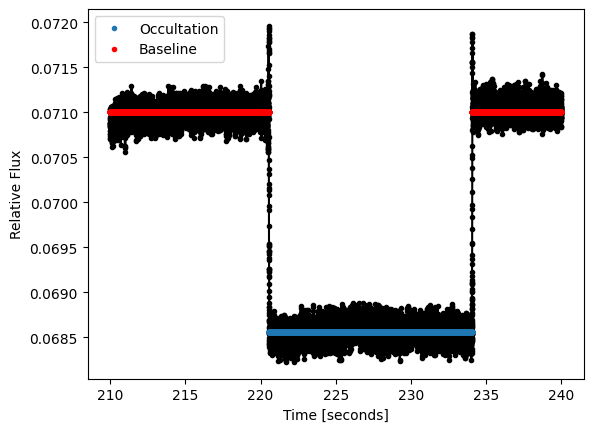

In [13]:
T1_raw_lc.occ_detect(plot=True)

/home/joshuabartkoske/mySORA_env/lib/python3.10/site-packages/sora/lightcurve/utils.py:106: OdrWarning: Empty data detected for ODR instance. Do not expect any fitting to occur
  myodr = odr.ODR(mydata, func, maxit=200)


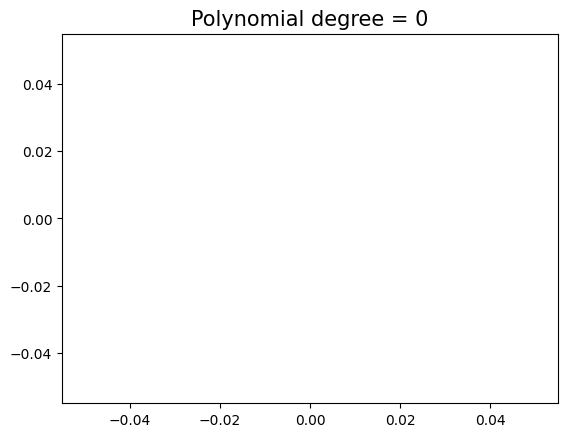

Normalization using a 0 degree polynomial
There is no improvement with a 1 degree polynomial


/home/joshuabartkoske/mySORA_env/lib/python3.10/site-packages/sora/lightcurve/utils.py:106: OdrWarning: Empty data detected for ODR instance. Do not expect any fitting to occur
  myodr = odr.ODR(mydata, func, maxit=200)
/home/joshuabartkoske/mySORA_env/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:4008: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/joshuabartkoske/mySORA_env/lib/python3.10/site-packages/numpy/_core/_methods.py:175: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/joshuabartkoske/mySORA_env/lib/python3.10/site-packages/numpy/_core/_methods.py:210: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [15]:
T1_raw_lc.normalize(plot=True)

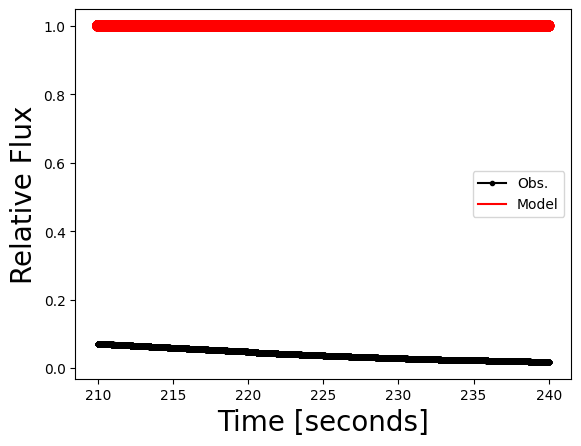

In [ ]:
T1_raw_lc.plot_lc()
pl.show()

In [ ]:
T1_lc = LightCurve(name='Telescope 1 lc',
                   file='/home/joshuabartkoske/AO/data/20201219/20201219-TYC2924_02100_1-T1-occultation-normalized-300Hz.txt',
                    exptime=1/300, usecols=[0,1], 
                    central_bandpass=0.415, delta_bandpass=0.2, 
                    tref="2020-12-19 06:15:02") # 18 Dec 2020 , 23:11:29 is the start of acquisition, 12-18-2020,23:11:43 is the first time stamp

print(T1_lc)


Light curve name: Telescope 1 lc
Initial time: 2020-12-19 06:18:32.001 UTC
End time:     2020-12-19 06:19:01.997 UTC
Duration:     0.500 minutes
Time offset:  0.000 seconds

Exposure time:    0.0033 seconds
Cycle time:       0.0033 seconds
Num. data points: 9000


There is no occultation associated with this light curve.

Object LightCurve model was not fitted.

Immersion and emersion times were not fitted or instantiated.




/home/joshuabartkoske/mySORA_env/lib/python3.10/site-packages/sora/lightcurve/core.py:436: UserWarning: Exposure time (0.0033 seconds) higher than Cycle time (0.0033 seconds)
  warnings.warn('Exposure time ({:0.4f} seconds) higher than Cycle time ({:0.4f} seconds)'.


{'rank': 1,
 'occultation_duration': np.float64(13.521531440349577),
 'central_time': np.float64(227.31985389263878),
 'immersion_time': np.float64(220.559088172464),
 'emersion_time': np.float64(234.08061961281356),
 'time_err': np.float64(0.0016666500012121332),
 'depth': np.float64(0.034446514491797364),
 'depth_err': np.float64(0.0012619972077498212),
 'baseline': np.float64(1.0008337384257386),
 'baseline_err': np.float64(0.0013470323677866828),
 'snr': np.float64(27.295238278075537),
 'occ_mask': array([False, False, False, ..., False, False, False])}

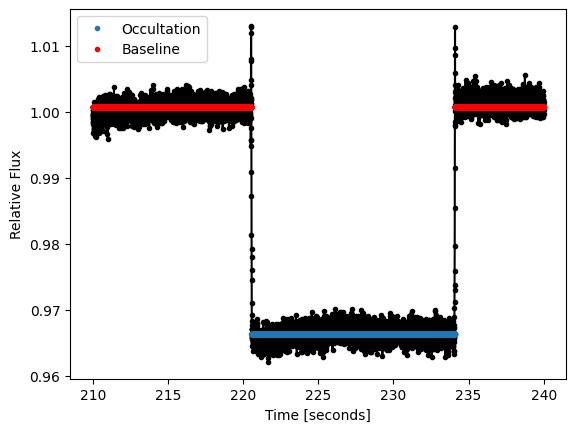

In [17]:
T1_lc.occ_detect(plot=True)

The light curve occultation model considers some physical parameters from the event:
- Distance between the geocenter and the occulting object (AU);
- Star diameter at the occulting object's distance (km);
- Nominal Velocity of the event (km/s);

These parameters can be automatic calculated as we connect the `LightCurve` and the `Observer` to the `Ocultation` Object.


In [21]:
#occ.chords.remove_chord(name='Telescope 1') #If you need to update the chord, you need to remove it first
occ.chords.add_chord(observer=T1,lightcurve=T1_lc)

print(T1_lc)

Light curve name: Telescope 1 lc
Initial time: 2020-12-19 06:18:32.001 UTC
End time:     2020-12-19 06:19:01.997 UTC
Duration:     0.500 minutes
Time offset:  0.000 seconds

Exposure time:    0.0033 seconds
Cycle time:       0.0033 seconds
Num. data points: 9000

Bandpass:             0.415 +/- 0.200 microns
Object Distance:      1.44 AU
Used shadow velocity: 11.522 km/s
Fresnel scale:        0.018 seconds or 0.21 km
Stellar size effect:  0.003 seconds or 0.04 km

Object LightCurve model was not fitted.

Immersion and emersion times were not fitted or instantiated.




/home/joshuabartkoske/mySORA_env/lib/python3.10/site-packages/sora/body/core.py:345: UserWarning: H and/or G is not defined for 13 Egeria. Searching into JPL Horizons service
  warnings.warn('H and/or G is not defined for {}. Searching into JPL Horizons service'.format(self.shortname))


Now, appart from the `LightCurve` Object having the needed parameters, also the `Occultation` object can acess the information from this `Chord`.

In [29]:
print(occ.chords)

-------------------------------------------------------------------------------
Site: Telescope 1
Geodetic coordinates: Lon: -110d57m03.456s, Lat: 31d40m29.5572s, height: 1.268 km
Target altitude: 72.0 deg
Target azimuth:  44.2 deg

Light curve name: Telescope 1 lc
Initial time: 2020-12-19 06:18:32.001 UTC
End time:     2020-12-19 06:19:01.997 UTC
Duration:     0.500 minutes
Time offset:  0.000 seconds

Exposure time:    0.0033 seconds
Cycle time:       0.0033 seconds
Num. data points: 9000

Bandpass:             0.415 +/- 0.200 microns
Object Distance:      1.44 AU
Used shadow velocity: 11.522 km/s
Fresnel scale:        0.018 seconds or 0.21 km
Stellar size effect:  0.003 seconds or 0.04 km

Object LightCurve model was not fitted.

Immersion and emersion times were not fitted or instantiated.




In [13]:
## We fit the modelled light curve, using chi square minimization and Monte Carlo procedures

T1_lc.occ_lcfit?

Signature: T1_lc.occ_lcfit(**kwargs)
Docstring:
Monte Carlo chi square fit for occultations lightcurve.

Parameters
----------
tmin : `int`, `float`
    Minimum time to consider in the fit procedure, in seconds.

tmax : `int`, `float`
    Maximum time to consider in the fit procedure, in seconds.

flux_min : `int`, `float`, default=0
    Bottom flux (only object).

flux_max :`int`, `float`, default=1
    Base flux (object plus star).

immersion_time : `int`, `float`
    Initial guess for immersion time, in seconds.

emersion_time : `int`, `float`
    Initial guess for emersion time, in seconds.

opacity : `int`, `float`, default=1
    Initial guess for opacity. Opaque = 1, Transparent = 0.

delta_t : `int`, `float`
    Interval to fit immersion or emersion time.

dopacity : `int`, `float`, default=0
    Interval to fit opacity.

sigma : `int`, `float`, `array`, 'auto'
    Fluxes errors. If None it will use the `self.dflux`. If 'auto' it
    will calculate using the region outside the e

In [24]:
## An automatic version can be used for cases where the occultation is obvious!!
## This process may take some minutes to run!!

T1_chi2 = T1_lc.occ_lcfit(loop=1000)
print('\n')
print(T1_chi2)

In [26]:
## However, we believe that the user should set the parameters by hand!!
## The complete description of each parameter can be seen at the function Docstring.
## This process may take some minutes to run!!

T1_chi2 = T1_lc.occ_lcfit(tmin=218.0, tmax=236.0, 
                            immersion_time=220.559, 
                            emersion_time=234.081, 
                            delta_t=1, loop=5000, 
                            #method='fastchi', 
                            threads=10)
print('\n')
print(T1_chi2)

LightCurve fit: |████████████████████████████████████████|  - 100% 


Minimum chi-square: 8355.189
Number of fitted points: 5400
Number of fitted parameters: 2
Minimum chi-square per degree of freedom: 1.548

immersion:
    1-sigma: 220.552 +/- 0.000
    3-sigma: 220.552 +/- 0.000

emersion:
    1-sigma: 234.094 +/- 0.000
    3-sigma: 234.094 +/- 0.000



**The user can visually acess the quality of the fit by ploting the** `ChiSquare` **object.**

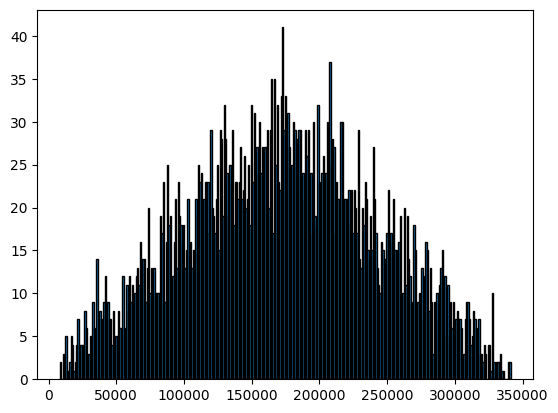

In [27]:
data = T1_chi2.data['chi2']

# Set desired bin width
bin_width = 1000
bins = np.arange(min(data), max(data) + bin_width, bin_width)


pl.hist(data, bins=bins, edgecolor='black')
pl.show()

In [70]:
T1_chi2.get_nsigma(sigma=5)

{'chi2_min': np.float64(5092.269628317672),
 'sigma': 5,
 'n_points': 1,
 'immersion': [np.float64(220.5710329573407), np.float64(0.0)],
 'emersion': [np.float64(234.08039832886163), np.float64(0.0)]}

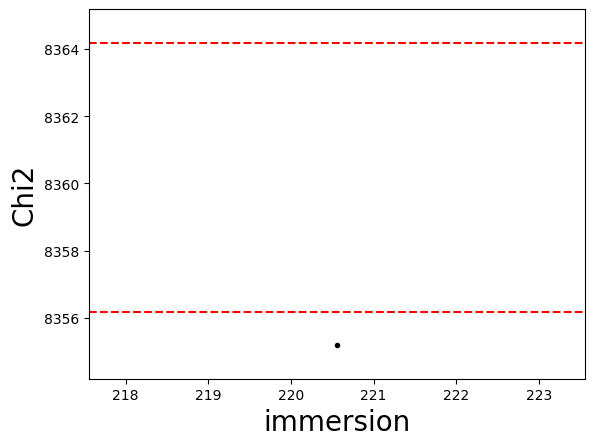

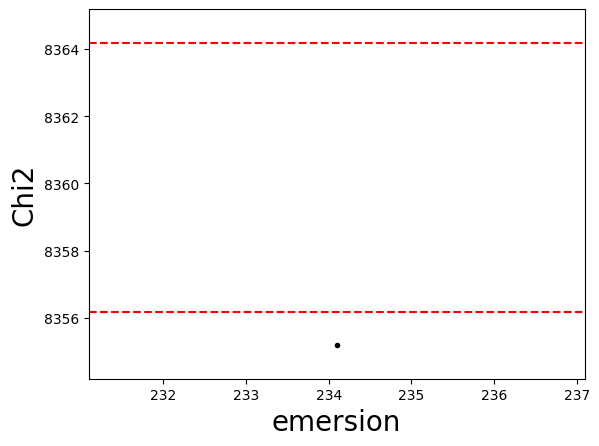

In [28]:
T1_chi2.plot_chi2('immersion')
# pl.xlim(220.566 - 0.1, 220.566 + 0.1)
# pl.ylim(4633, 4650)
pl.show()

T1_chi2.plot_chi2('emersion')
#pl.xlim(234.079 - 0.20, 234.079 + 0.20)
pl.show()


**Also, the user can visually acess the quality of the fit by ploting the** `LightCurve`.

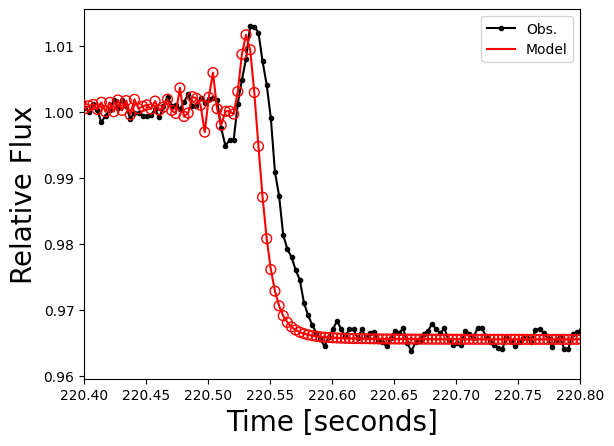

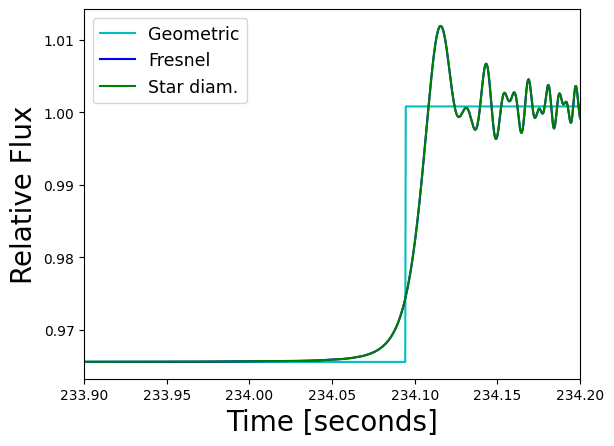

In [30]:
T1_lc.plot_lc()
pl.xlim(220.4, 220.8) # for ingress
#pl.xlim(233.9, 234.2) # for egress
pl.show()

T1_lc.plot_model()
pl.legend(ncol=1, fontsize=12.5, loc=2)
#pl.xlim(220.4, 220.8) # for ingress
pl.xlim(233.9, 234.2) # for egress
pl.show()

In [31]:
print(T1_lc)

Light curve name: Telescope 1 lc
Initial time: 2020-12-19 06:18:32.001 UTC
End time:     2020-12-19 06:19:01.997 UTC
Duration:     0.500 minutes
Time offset:  0.000 seconds

Exposure time:    0.0033 seconds
Cycle time:       0.0033 seconds
Num. data points: 9000

Bandpass:             0.415 +/- 0.200 microns
Object Distance:      1.44 AU
Used shadow velocity: 11.522 km/s
Fresnel scale:        0.018 seconds or 0.21 km
Stellar size effect:  0.003 seconds or 0.04 km
Inst. response:       0.003 seconds or 0.04 km
Dead time effect:     -0.000 seconds or -0.00 km
Model resolution:     0.000 seconds or 0.00 km
Modelled baseflux:    1.001
Modelled bottomflux:  0.966
Light curve sigma:    0.001

Immersion time: 2020-12-19 06:18:42.552 UTC +/- 0.000 seconds
Emersion time:  2020-12-19 06:18:56.094 UTC +/- 0.000 seconds

Monte Carlo chi square fit.

Minimum chi-square: 8355.189
Number of fitted points: 5400
Number of fitted parameters: 2
Minimum chi-square per degree of freedom: 1.548

immersion:


**Finally, the user can visually see the chord in the Sky-plane using the** `Chord` **Object.**

/home/joshuabartkoske/mySORA_env/lib/python3.10/site-packages/sora/occultation/chordlist.py:238: UserWarning: Segment "error" was not found on any chord
  warnings.warn('Segment "{}" was not found on any chord'.format(segment))


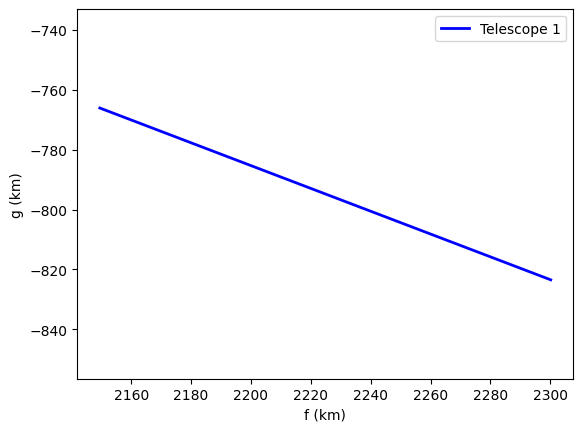

In [32]:
occ.chords.plot_chords(segment='positive', color='blue')
occ.chords.plot_chords(segment='error', color='red')
pl.legend()
pl.show()

**Now, let's add the other chords of this occultation.**

In [ ]:
#occ.chords.remove_chord(name='Telescope 2') #If you need to update the chord, you need to remove it first
T2_lc = LightCurve(name='Telescope 2 lc',
                   file='/home/joshuabartkoske/AO/data/20201219/20201219-TYC2924_02100_1-T2-occultation-normalized-300Hz.txt',
                    exptime=1/300, 
                    usecols=[0,1], 
                    central_bandpass=0.415, delta_bandpass=0.2, 
                    #initial_time="2020-12-19 06:14:51" , # I don't know why I put this into the initial time
                    tref="2020-12-19 06:15:02") # 23:11:31 is the start time of acquisition, 12-18-2020,23:11:45 is the first time stamp

occ.chords.add_chord(observer=T2,lightcurve=T2_lc)
print(occ.chords)


/home/joshuabartkoske/mySORA_env/lib/python3.10/site-packages/sora/lightcurve/core.py:436: UserWarning: Exposure time (0.0033 seconds) higher than Cycle time (0.0033 seconds)
  warnings.warn('Exposure time ({:0.4f} seconds) higher than Cycle time ({:0.4f} seconds)'.


-------------------------------------------------------------------------------
Site: Telescope 1
Geodetic coordinates: Lon: -110d57m03.456s, Lat: 31d40m29.5572s, height: 1.268 km
Target altitude: 72.0 deg
Target azimuth:  44.2 deg

Light curve name: Telescope 1 lc
Initial time: 2020-12-19 06:18:32.001 UTC
End time:     2020-12-19 06:19:01.997 UTC
Duration:     0.500 minutes
Time offset:  0.000 seconds

Exposure time:    0.0033 seconds
Cycle time:       0.0033 seconds
Num. data points: 9000

Bandpass:             0.415 +/- 0.200 microns
Object Distance:      1.44 AU
Used shadow velocity: 11.522 km/s
Fresnel scale:        0.018 seconds or 0.21 km
Stellar size effect:  0.003 seconds or 0.04 km
Inst. response:       0.003 seconds or 0.04 km
Dead time effect:     -0.000 seconds or -0.00 km
Model resolution:     0.000 seconds or 0.00 km
Modelled baseflux:    1.001
Modelled bottomflux:  0.966
Light curve sigma:    0.001

Immersion time: 2020-12-19 06:18:42.552 UTC +/- 0.000 seconds
Emersion 

{'rank': 1,
 'occultation_duration': np.float64(13.528198040344819),
 'central_time': np.float64(225.5662745938923),
 'immersion_time': np.float64(218.8021755737199),
 'emersion_time': np.float64(232.3303736140647),
 'time_err': np.float64(0.0016666500012121332),
 'depth': np.float64(0.03618873511252041),
 'depth_err': np.float64(0.0013658036074896975),
 'baseline': np.float64(1.0010680033805668),
 'baseline_err': np.float64(0.001693354517513357),
 'snr': np.float64(26.496294865580364),
 'occ_mask': array([False, False, False, ..., False, False, False])}

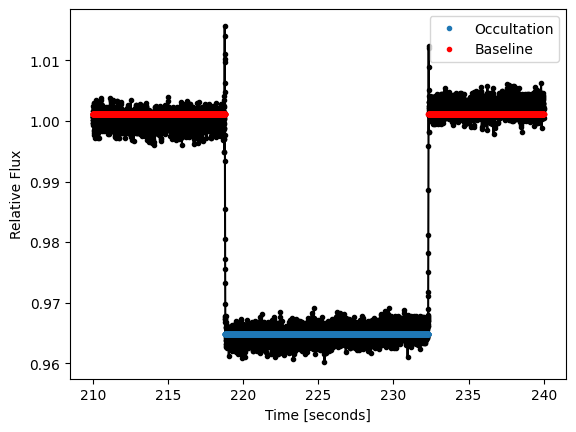

In [34]:
T2_lc.occ_detect(plot=True)

In [35]:
T2_chi2 = T2_lc.occ_lcfit(tmin=218.0, tmax=236.0, 
                            immersion_time=218.802, 
                            emersion_time=232.330, 
                            delta_t=1, loop=5000, 
                            #method='fastchi', 
                            threads=10)
print('\n')
print(T2_chi2)

LightCurve fit: |████████████████████████████████████████|  - 100% 


Minimum chi-square: 7764.226
Number of fitted points: 5400
Number of fitted parameters: 2
Minimum chi-square per degree of freedom: 1.438

immersion:
    1-sigma: 218.806 +/- 0.000
    3-sigma: 218.806 +/- 0.000

emersion:
    1-sigma: 232.301 +/- 0.000
    3-sigma: 232.301 +/- 0.000



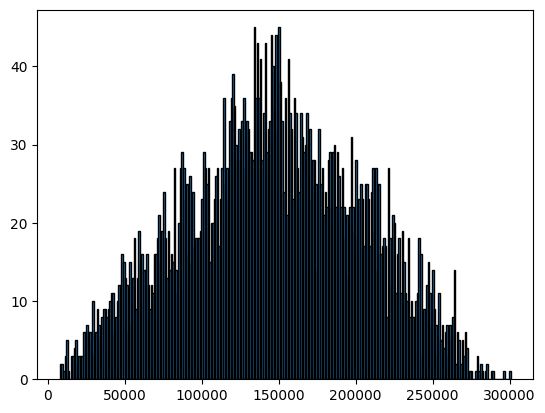

In [36]:
data = T2_chi2.data['chi2']

# Set desired bin width
bin_width = 1000
bins = np.arange(min(data), max(data) + bin_width, bin_width)


pl.hist(data, bins=bins, edgecolor='black')
pl.show()

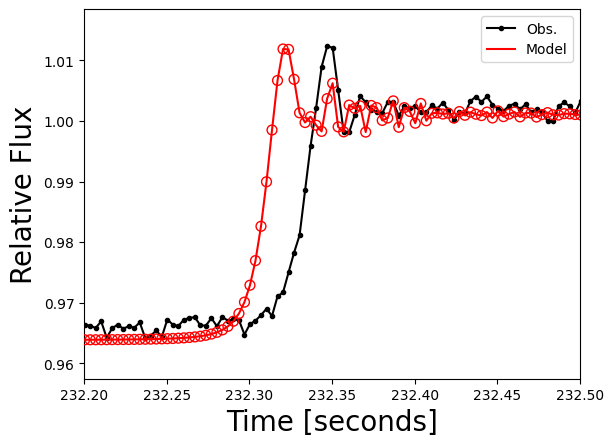

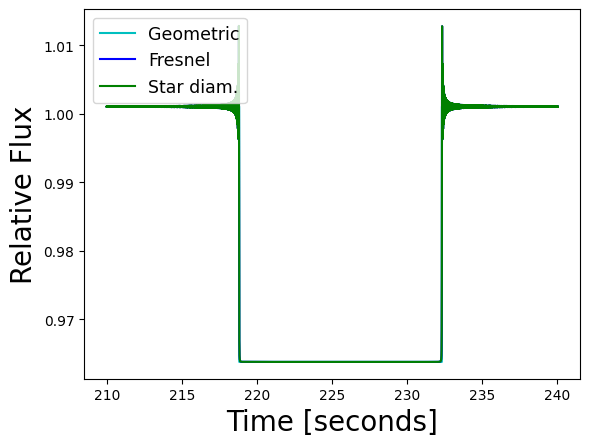

In [39]:
T2_lc.plot_lc()
#pl.xlim(218.6, 218.9) # for ingress
pl.xlim(232.2, 232.5) # for egress
pl.show()

T2_lc.plot_model()
pl.legend(ncol=1, fontsize=12.5, loc=2)
#pl.xlim(218.6, 218.9) # for ingress
#pl.xlim(232.2, 232.5) # for egress
pl.show()

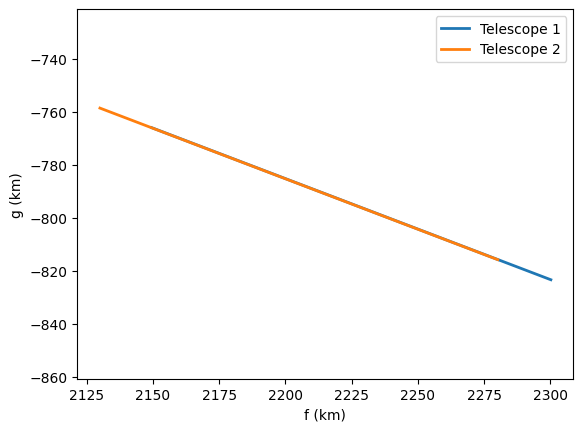

In [40]:
occ.chords.plot_chords()
pl.legend()
pl.show()

**Telescope 3**

In [ ]:
#occ.chords.remove_chord(name='Telescope 3') #If you need to update the chord, you need to remove it first
T3_lc = LightCurve(name='Telescope 3 lc',
                   file='/home/joshuabartkoske/AO/data/20201219/20201219-TYC2924_02100_1-T3-occultation-normalized-300Hz.txt',
                    exptime=1/300, 
                    usecols=[0,1], 
                    central_bandpass=0.415, delta_bandpass=0.2, 
                    #initial_time="2020-12-19 06:14:51" , 
                    tref="2020-12-19 06:15:02") # 23:11:33 is the start of acquisition, , 12-18-2020,23:11:47 is the first time stamp

occ.chords.add_chord(observer=T3,lightcurve=T3_lc)
print(occ.chords)


/home/joshuabartkoske/mySORA_env/lib/python3.10/site-packages/sora/lightcurve/core.py:436: UserWarning: Exposure time (0.0033 seconds) higher than Cycle time (0.0033 seconds)
  warnings.warn('Exposure time ({:0.4f} seconds) higher than Cycle time ({:0.4f} seconds)'.


-------------------------------------------------------------------------------
Site: Telescope 1
Geodetic coordinates: Lon: -110d57m03.456s, Lat: 31d40m29.5572s, height: 1.268 km
Target altitude: 72.0 deg
Target azimuth:  44.2 deg

Light curve name: Telescope 1 lc
Initial time: 2020-12-19 06:18:32.001 UTC
End time:     2020-12-19 06:19:01.997 UTC
Duration:     0.500 minutes
Time offset:  0.000 seconds

Exposure time:    0.0033 seconds
Cycle time:       0.0033 seconds
Num. data points: 9000

Bandpass:             0.415 +/- 0.200 microns
Object Distance:      1.44 AU
Used shadow velocity: 11.522 km/s
Fresnel scale:        0.018 seconds or 0.21 km
Stellar size effect:  0.003 seconds or 0.04 km
Inst. response:       0.003 seconds or 0.04 km
Dead time effect:     -0.000 seconds or -0.00 km
Model resolution:     0.000 seconds or 0.00 km
Modelled baseflux:    1.001
Modelled bottomflux:  0.966
Light curve sigma:    0.001

Immersion time: 2020-12-19 06:18:42.552 UTC +/- 0.000 seconds
Emersion 

{'rank': 1,
 'occultation_duration': np.float64(13.514864840354335),
 'central_time': np.float64(223.81295879514366),
 'immersion_time': np.float64(217.0555263749665),
 'emersion_time': np.float64(230.57039121532083),
 'time_err': np.float64(0.0016666500012121332),
 'depth': np.float64(0.046151744906434033),
 'depth_err': np.float64(0.0015915189884228762),
 'baseline': np.float64(1.000078499555016),
 'baseline_err': np.float64(0.0014877213522613408),
 'snr': np.float64(28.99855122191683),
 'occ_mask': array([False, False, False, ..., False, False, False])}

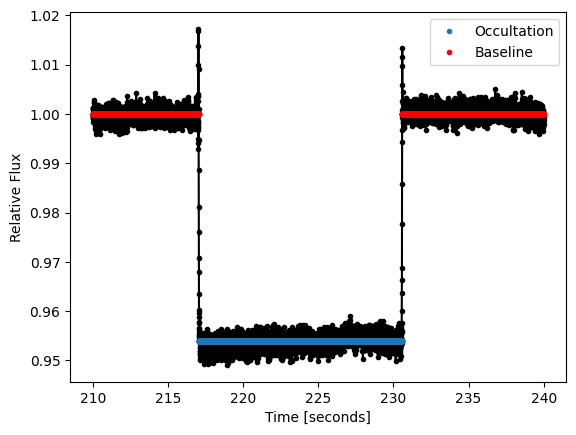

In [43]:
T3_lc.occ_detect(plot=True)

In [44]:
T3_chi2 = T3_lc.occ_lcfit(tmin=218.0, tmax=236.0, 
                            immersion_time=217.055, 
                            emersion_time=230.570, 
                            delta_t=1, loop=5000, 
                            #method='fastchi', 
                            threads=10)
print('\n')
print(T3_chi2)

LightCurve fit: |████████████████████████████████████████|  - 100% 


Minimum chi-square: 4836.808
Number of fitted points: 5400
Number of fitted parameters: 2
Minimum chi-square per degree of freedom: 0.896

immersion:
    1-sigma: 216.355 +/- 0.000
    3-sigma: 217.118 +/- 0.763

emersion:
    1-sigma: 230.568 +/- 0.000
    3-sigma: 230.568 +/- 0.000



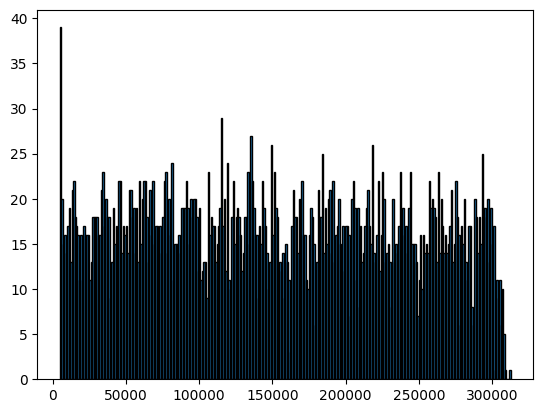

In [45]:
data = T3_chi2.data['chi2']

# Set desired bin width
bin_width = 1000
bins = np.arange(min(data), max(data) + bin_width, bin_width)


pl.hist(data, bins=bins, edgecolor='black')
pl.show()

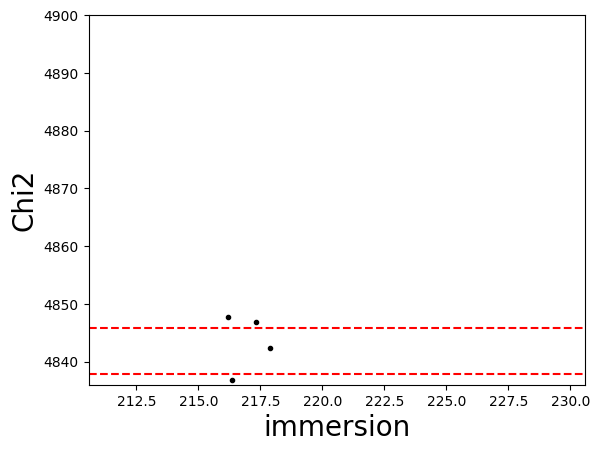

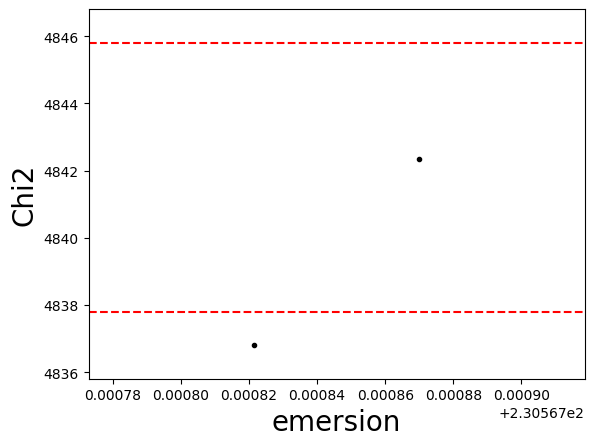

In [48]:
T3_chi2.plot_chi2('immersion')
pl.xlim(220.566 - 10, 220.566 + 10)
pl.ylim(4836, 4900)
pl.show()

T3_chi2.plot_chi2('emersion')
#pl.xlim(234.079 - 0.20, 234.079 + 0.20)
pl.show()

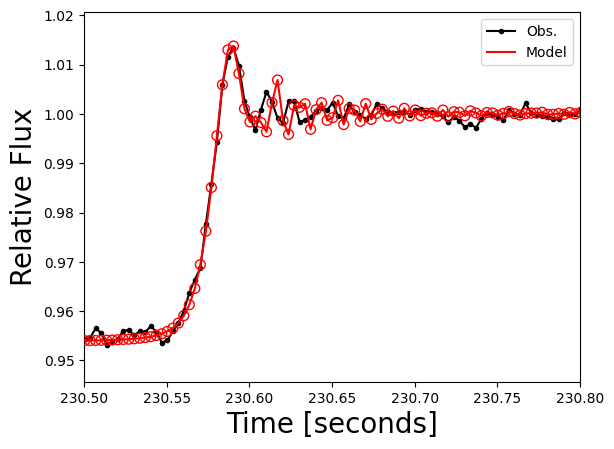

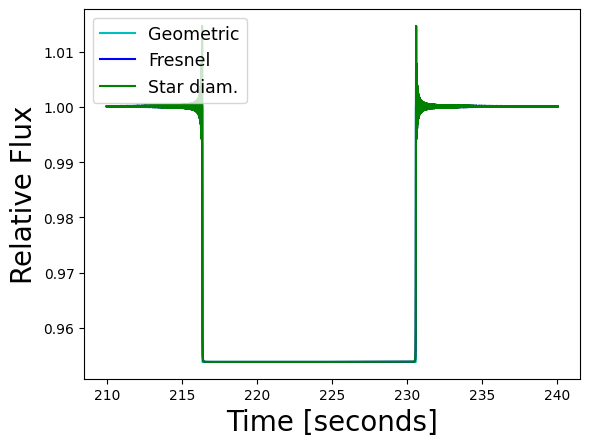

In [ ]:
T3_lc.plot_lc()
#pl.xlim(216.1, 217.8) # for ingress
#pl.xlim(230.5, 230.8) # for egress
pl.show()

T3_lc.plot_model()
pl.legend(ncol=1, fontsize=12.5, loc=2)
#pl.xlim(216.3, 216.8) # for ingress
#pl.xlim(230.5, 230.8) # for egress
pl.show()

In [54]:
#occ.chords.remove_chord(name='Telescope 4') #If you need to update the chord, you need to remove it first
T4_lc = LightCurve(name='Telescope 4 lc',
                   file='/home/joshuabartkoske/AO/data/20201219/20201219-TYC2924_02100_1-T4-occultation-normalized-300Hz.txt',
                    exptime=1/300, 
                    usecols=[0,1], 
                    central_bandpass=0.415, delta_bandpass=0.2, 
                    #initial_time="2020-12-19 06:14:51" , 
                    tref="2020-12-19 06:15:02") # 23:11:34 is the start time of acquisition, 12-18-2020,23:11:48 is the first time stamp

occ.chords.add_chord(observer=T4,lightcurve=T4_lc)
print(occ.chords)

/home/joshuabartkoske/mySORA_env/lib/python3.10/site-packages/sora/lightcurve/core.py:436: UserWarning: Exposure time (0.0033 seconds) higher than Cycle time (0.0033 seconds)
  warnings.warn('Exposure time ({:0.4f} seconds) higher than Cycle time ({:0.4f} seconds)'.


-------------------------------------------------------------------------------
Site: Telescope 1
Geodetic coordinates: Lon: -110d57m03.456s, Lat: 31d40m29.5572s, height: 1.268 km
Target altitude: 72.0 deg
Target azimuth:  44.2 deg

Light curve name: Telescope 1 lc
Initial time: 2020-12-19 06:18:32.001 UTC
End time:     2020-12-19 06:19:01.997 UTC
Duration:     0.500 minutes
Time offset:  0.000 seconds

Exposure time:    0.0033 seconds
Cycle time:       0.0033 seconds
Num. data points: 9000

Bandpass:             0.415 +/- 0.200 microns
Object Distance:      1.44 AU
Used shadow velocity: 11.522 km/s
Fresnel scale:        0.018 seconds or 0.21 km
Stellar size effect:  0.003 seconds or 0.04 km
Inst. response:       0.003 seconds or 0.04 km
Dead time effect:     -0.000 seconds or -0.00 km
Model resolution:     0.000 seconds or 0.00 km
Modelled baseflux:    1.001
Modelled bottomflux:  0.966
Light curve sigma:    0.001

Immersion time: 2020-12-19 06:18:42.552 UTC +/- 0.000 seconds
Emersion 

{'rank': 1,
 'occultation_duration': np.float64(13.521531440349577),
 'central_time': np.float64(222.28964069623086),
 'immersion_time': np.float64(215.52887497605607),
 'emersion_time': np.float64(229.05040641640565),
 'time_err': np.float64(0.0016666500012121332),
 'depth': np.float64(0.03849908718347017),
 'depth_err': np.float64(0.001384268680913322),
 'baseline': np.float64(1.0009386915216512),
 'baseline_err': np.float64(0.0015645349615178075),
 'snr': np.float64(27.811860308844803),
 'occ_mask': array([False, False, False, ..., False, False, False])}

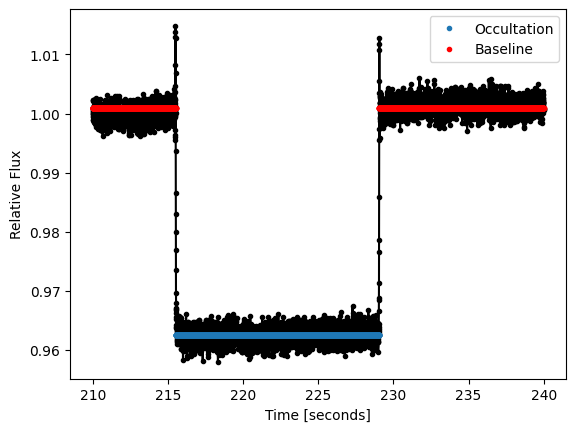

In [55]:
T4_lc.occ_detect(plot=True)

In [56]:
T4_chi2 = T4_lc.occ_lcfit(tmin=218.0, tmax=236.0, 
                            immersion_time=215.5, 
                            emersion_time=229.0, 
                            delta_t=1, loop=5000, 
                            #method='fastchi', 
                            threads=10)
print('\n')
print(T4_chi2)

LightCurve fit: |████████████████████████████████████████|  - 100% 


Minimum chi-square: 1084.238
Number of fitted points: 5400
Number of fitted parameters: 2
Minimum chi-square per degree of freedom: 0.201

immersion:
    1-sigma: 215.444 +/- 0.296
    3-sigma: 215.544 +/- 0.845

emersion:
    1-sigma: 229.045 +/- 0.000
    3-sigma: 229.045 +/- 0.001



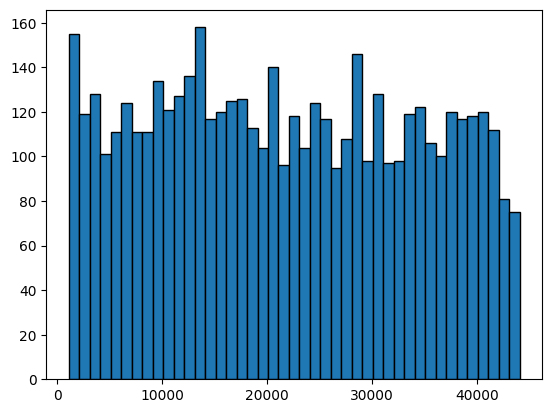

In [57]:
data = T4_chi2.data['chi2']

# Set desired bin width
bin_width = 1000
bins = np.arange(min(data), max(data) + bin_width, bin_width)


pl.hist(data, bins=bins, edgecolor='black')
pl.show()

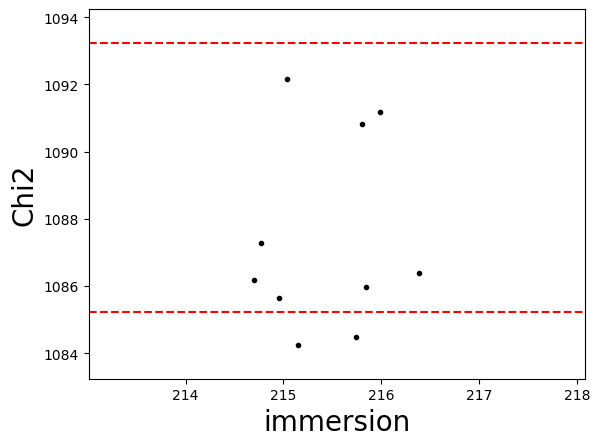

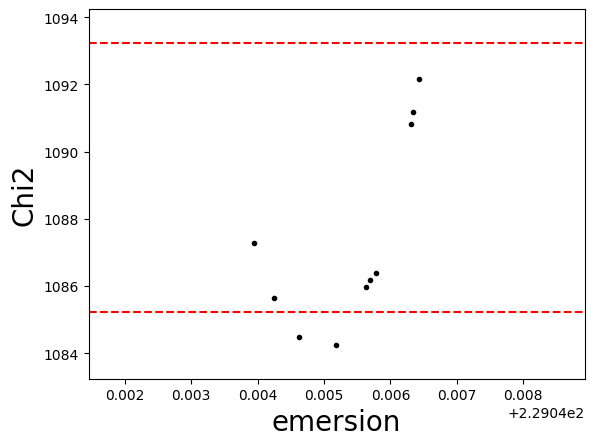

In [59]:
T4_chi2.plot_chi2('immersion')
# pl.xlim(220.566 - 10, 220.566 + 10)
# pl.ylim(4836, 4900)
pl.show()

T4_chi2.plot_chi2('emersion')
#pl.xlim(234.079 - 0.20, 234.079 + 0.20)
pl.show()

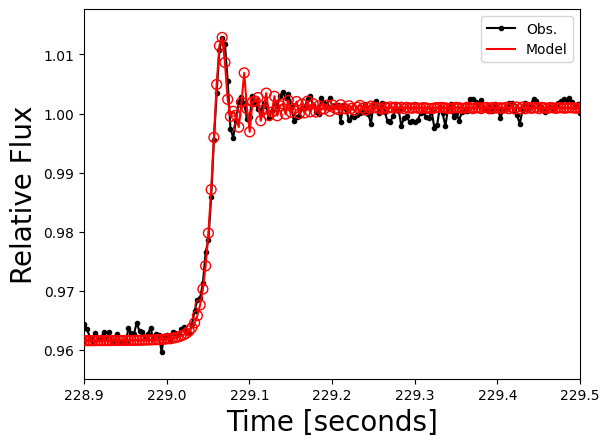

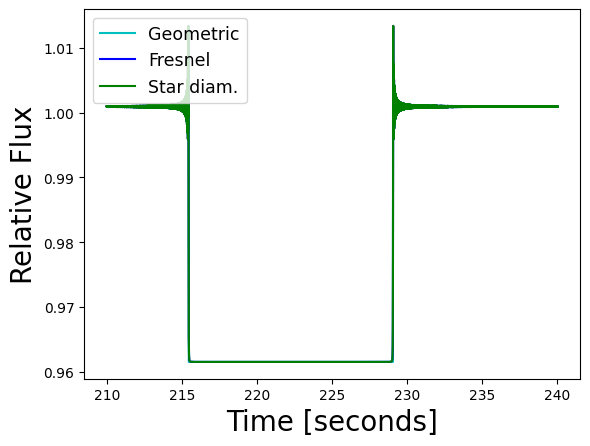

In [ ]:
T4_lc.plot_lc()
#pl.xlim(215.3, 215.9) # for ingress
#pl.xlim(228.9, 229.5) # for egress
pl.show()

T4_lc.plot_model()
pl.legend(ncol=1, fontsize=12.5, loc=2)
#pl.xlim(215.3, 215.9) # for ingress
#pl.xlim(229.0, 229.6) # for egress
pl.show()

**Chords display and ellipse fit**

After all light curves were instanciated and/or fitted, the next step is to plot the chords and fit the elipse. 

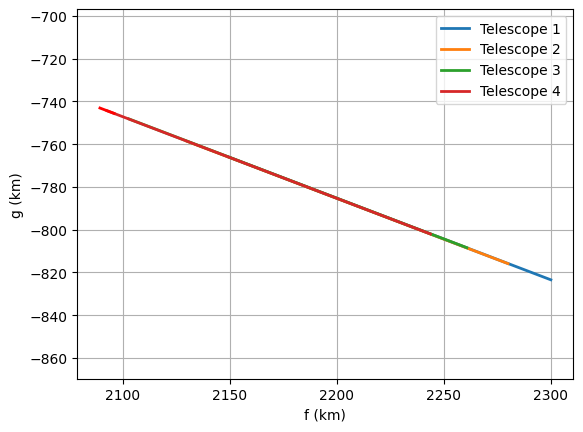

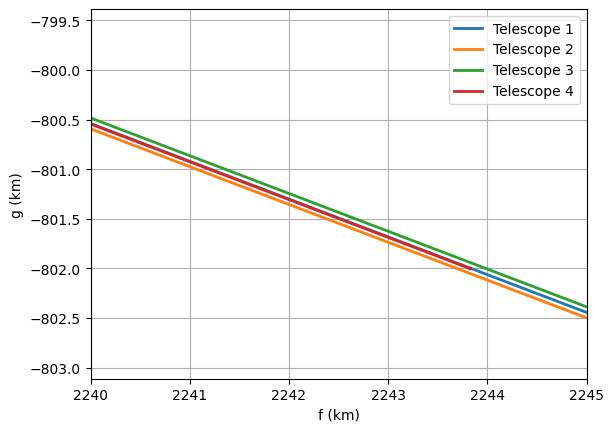

In [69]:
occ.chords.plot_chords()
occ.chords.plot_chords(segment='error', color='red')

pl.grid()
pl.legend(loc=1)
pl.show()

occ.chords.plot_chords()
occ.chords.plot_chords(segment='error', color='red')

pl.grid()
pl.legend(loc=1)
pl.xlim(2240, 2245)
pl.ylim(-802.5,-800)
pl.show()


In [70]:
print(occ)

Stellar occultation of star GaiaDR3 193323800915713024 by 13 Egeria (A850 VA).

Geocentric Closest Approach: 1.645 arcsec
Instant of CA: 2020-12-19 06:13:50.660
Position Angle: 201.16 deg
Geocentric shadow velocity: -11.52 km / s
Sun-Geocenter-Target angle:  159.93 deg
Moon-Geocenter-Target angle: 122.50 deg


4 positive observations

###############################################################################
                                     STAR                                      
###############################################################################
GaiaDR3 star Source ID: 193323800915713024
ICRS star coordinate at J2016.0:
RA=5h55m35.54725s +/- 0.0173 mas, DEC=43d26m22.6999s +/- 0.0150 mas
pmRA=0.326 +/- 0.019 mas/yr, pmDEC=-3.370 +/- 0.014 mas/yr
GaiaDR3 Proper motion corrected as suggested by Cantat-Gaudin & Brandt (2021) 
Plx=0.8327 +/- 0.0208 mas, Rad. Vel.=17.16 +/- 4.13 km/s 

Magnitudes: G: 11.189, B: 11.642, V: 11.374, R: 11.200, J: 10.458, H: 10.336,
    

**The next step is to fit an ellipse to the chords**

In [68]:
## We fit a ellipse using chi square minimization and Monte Carlo procedures, the 
## The complete description of each parameter can be seen at the function Docstring.

occ.fit_ellipse?

Signature: occ.fit_ellipse(**kwargs)
Docstring:
Fits an ellipse to given occultation using given parameters.

Parameters
----------
center_f : `int`, `float`, default=0
    The coordinate in f of the ellipse center.

center_g : `int`, `float`, default=0
    The coordinate in g of the ellipse center.

equatorial_radius : `int`, `float`
    The Equatorial radius (semi-major axis) of the ellipse.

oblateness : `int`, `float`, default=0
    The oblateness of the ellipse.

position_angle : `int`, `float`, default=0
    The pole position angle of the ellipse in degrees.
    Zero is in the North direction ('g-positive'). Positive clockwise.

dcenter_f : `int`, `float`
    Interval for coordinate f of the ellipse center.

dcenter_g : `int`, `float`
    Interval for coordinate g of the ellipse center.

dequatorial_radius `int`, `float`
    Interval for the Equatorial radius (semi-major axis) of the ellipse.

doblateness : `int`, `float`
    Interval for the oblateness of the ellipse

dposition_

In [29]:
### This may take some minutes to run!!

ellipse_chi2  = occ.fit_ellipse(center_f=-15.046, center_g=-2.495, dcenter_f=3, dcenter_g=10, 
                                equatorial_radius=138, dequatorial_radius=3, oblateness=0.093, 
                                doblateness=0.02, position_angle=126, dposition_angle=10 ,loop=10000000,
                                dchi_min=10,number_chi=10000)


print(ellipse_chi2)

Minimum chi-square: 12.130
Number of fitted points: 10
Number of fitted parameters: 5
Minimum chi-square per degree of freedom: 2.426

center_f:
    1-sigma: -13.613 +/- 0.120
    3-sigma: -13.611 +/- 0.430

center_g:
    1-sigma: -2.094 +/- 0.499
    3-sigma: -2.089 +/- 1.626

equatorial_radius:
    1-sigma: 138.657 +/- 0.373
    3-sigma: 138.673 +/- 1.445

oblateness:
    1-sigma: 0.086 +/- 0.003
    3-sigma: 0.086 +/- 0.010

position_angle:
    1-sigma: 123.956 +/- 1.496
    3-sigma: 124.121 +/- 5.140



**Similar, to the** `LightCurve` **fit, the user can visually acess the quality of the fit by ploting the** `ChiSquare` **object.**

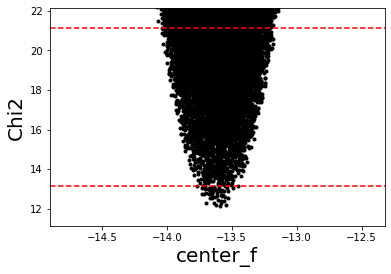

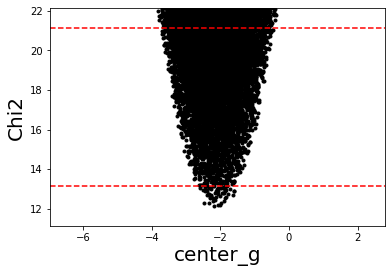

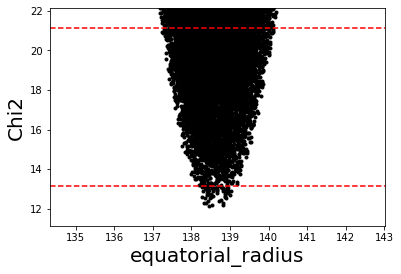

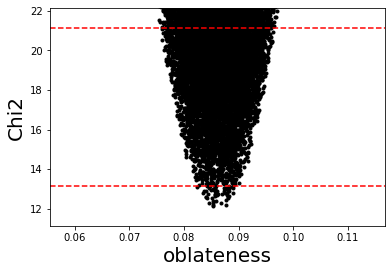

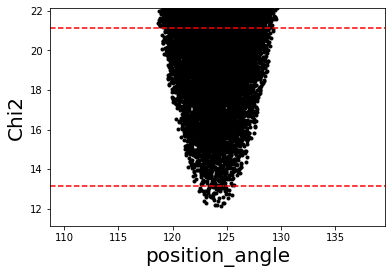

In [30]:
ellipse_chi2.plot_chi2()

**Also, the user can visually acess the quality of the fit by ploting the** `Chords` **and the fitted ellipses.**

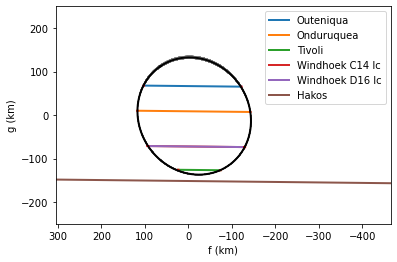

In [31]:
occ.chords.plot_chords()
occ.chords.plot_chords(segment='error', color='red')

#plotting the best fitted ellipse, in black
draw_ellipse(**ellipse_chi2.get_values())

# ploting all the ellipses within 3-sigma, in gray
draw_ellipse(**ellipse_chi2.get_values(sigma=3),alpha=1.0)

pl.legend(loc=1)
pl.xlim(+170,-330)
pl.ylim(-250,+250)
pl.show()

**The resulting values can be acessed from the Dictionaries** `Occultation.fitted_params` **and** `Occultation.chi2_params`

In [32]:
occ.fitted_params

{'equatorial_radius': [138.65650796361007, 0.3729805506807651],
 'center_f': [-13.612927096827903, 0.11996518649955146],
 'center_g': [-2.0936385736495167, 0.4992405703706848],
 'oblateness': [0.08573692161473534, 0.003305360393147015],
 'position_angle': [123.95618703950413, 1.4957816035600828]}

In [33]:
occ.chi2_params

{'chord_name': ['Outeniqua_immersion',
  'Outeniqua_emersion',
  'Onduruquea_immersion',
  'Onduruquea_emersion',
  'Tivoli_immersion',
  'Tivoli_emersion',
  'Windhoek C14 lc_immersion',
  'Windhoek C14 lc_emersion',
  'Windhoek D16 lc_immersion',
  'Windhoek D16 lc_emersion'],
 'radial_dispersion': array([ 0.64886238, -0.82234285, -0.20941195,  0.0507056 ,  0.14404744,
        -2.02271261,  0.3135147 , -0.1926379 , -0.76516855,  0.53220478]),
 'position_angle': array([301.95754708,  58.93979955, 274.10063776,  84.70868609,
        205.80484092, 163.27224646, 238.45346645, 123.09039914,
        238.19141651, 122.87262257]),
 'radial_error': array([0.60995255, 0.64472971, 0.22353256, 0.24588816, 0.24592892,
        0.8495755 , 0.53652931, 0.58124429, 0.62595044, 0.76008871]),
 'chi2_min': 12.129614721820191,
 'nparam': 5,
 'npts': 10}

**Besides the size and shape of the body the astrometrical positions obtained using stellar occultation  is also a relevant result from the occultation and it has a precision that can be compared with space probes results (few km)**


In [34]:
occ.new_astrometric_position()

Ephemeris offset (km): X = -13.6 km +/- 0.1 km; Y = -2.1 km +/- 0.5 km
Ephemeris offset (mas): da_cos_dec = -1.280 +/- 0.011; d_dec = -0.197 +/- 0.047

Astrometric object position at time 2017-06-22 21:18:48.200 for reference 'geocenter'
RA = 18 55 15.6523911 +/- 0.034 mas; DEC = -31 31 21.622094 +/- 0.058 mas


**After the instanciation of the** `Chords` **and the ellipse fit, the posfit occultation map can be plotted.**

In [35]:
occ.plot_occ_map(centermap_delta=[-3500,+400],zoom=20,nameimg='guidelines/figures/map_posfit')

Projected shadow radius = 135.0 km
guidelines/figures/map_posfit.png generated


<img src='guidelines/figures/map_posfit.png' style='width:600px;height:500px'/>


**Finally, the log contains all the details**

In [36]:
print(occ)

Stellar occultation of star GaiaDR3 6760223758801661440 by 10199 Chariklo (1997 CU26).

Geocentric Closest Approach: 0.049 arcsec
Instant of CA: 2017-06-22 21:18:48.200
Position Angle: 359.72 deg
Geocentric shadow velocity: -22.00 km / s
Sun-Geocenter-Target angle:  166.42 deg
Moon-Geocenter-Target angle: 149.11 deg


5 positive observations
1 negative observations

###############################################################################
                                     STAR                                      
###############################################################################
GaiaDR3 star Source ID: 6760223758801661440
ICRS star coordinate at J2016.0:
RA=18h55m15.65210s +/- 0.0197 mas, DEC=-31d31m21.6676s +/- 0.0180 mas
pmRA=3.556 +/- 0.025 mas/yr, pmDEC=-2.050 +/- 0.020 mas/yr
GaiaDR3 Proper motion corrected as suggested by Cantat-Gaudin & Brandt (2021) 
Plx=0.2121 +/- 0.0228 mas, Rad. Vel.=-40.49 +/- 3.73 km/s 

Magnitudes: G: 14.224, B: 14.320, V: 13.530, R

**You can find more information about each Class at their specific Jupyter-Notebook.**

**The END**